In [1]:
## Blending through Bayesian Optimization ##

In [2]:
import numpy as np 
import pandas as pd 
from functools import reduce
import seaborn as sns

In [3]:
# Import submission dataset from each model
subLgb = pd.read_csv('../../datatmp/data/submissionlgb.csv')
subCatb = pd.read_csv('../../datatmp/data/submissioncatb.csv')
subXgb = pd.read_csv('../../datatmp/data/submissionxgb.csv')

In [4]:
# merge efficiently, from https://www.kaggle.com/ishaan45/thank-you
def merge(dfs, merge_keys):
    dfs_merged = reduce(lambda left,right: pd.merge(left, right, on=merge_keys), dfs)
    return dfs_merged

In [5]:
dfs = [subLgb, subCatb, subXgb]
key=['SK_ID_CURR']
mergesubs = merge(dfs, merge_keys=key)

In [7]:
mergesubs.columns = ['SK_ID_CURR','lgb','catb','xgb']
mergesubs.head()

,SK_ID_CURR,lgb,catb,xgb
0,100001,0.026839,0.186442,0.062045
1,100005,0.095492,0.367075,0.200636
2,100013,0.023603,0.090786,0.069034
3,100028,0.031224,0.119418,0.062805
4,100038,0.160381,0.464311,0.288435


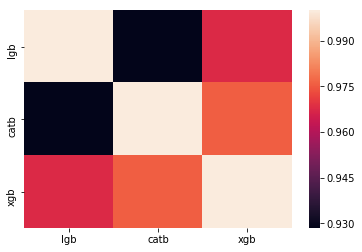

In [9]:
# Check correlation
corrm = mergesubs.drop(['SK_ID_CURR'],axis=1).corr()
sns.heatmap(corrm)

In [37]:
# Give more importance to less correlated classifiers
blendP = 0.70 * mergesubs['lgb'] + 0.25 * mergesubs['xgb'] + 0.05 * mergesubs['xgb']

In [38]:
# submit blends predictions
subdf = pd.DataFrame({'SK_ID_CURR': mergesubs['SK_ID_CURR'] , 'TARGET': blendP})
subdf.to_csv('../../datatmp/data/submissionblend.csv', index=False)